# KNN 과제

#### 개요
KNN classifier 구현 : Iris_knn_Assignment_example.ipynb 참고

1) Preprocessing / EDA\
2) KNN classifier
    * K
    * Distance Measure : Euclidean? Manhattan?
    * Weighted voting? Majority voting?
3) Evaluation

#### 데이터 출처

iris 데이터 (https://www.kaggle.com/uciml/iris)


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import operator

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
iris = load_iris()
feats_x = iris.feature_names
df_x = pd.DataFrame(iris.data, columns=feats_x)
print(df_x.shape)
df_x.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 0 = setosa, 1 = versicolor, 2 = virginica

df_y = pd.DataFrame(iris.target, columns=['species'])
print(df_y.shape)
df_y.head()

(150, 1)


,species
0,0
1,0
2,0
3,0
4,0


In [6]:
print(df_x.info())
df_x.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


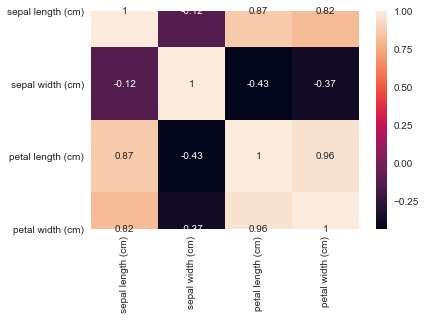

In [7]:
sns.heatmap(df_x.corr(),annot=True) 
fig=plt.gcf()
plt.show()

* petal length, petal width, sepal length는 거의 똑같은 얘기를 하고 있네요
* sepal width 혼자 따로 놀고있습니다.

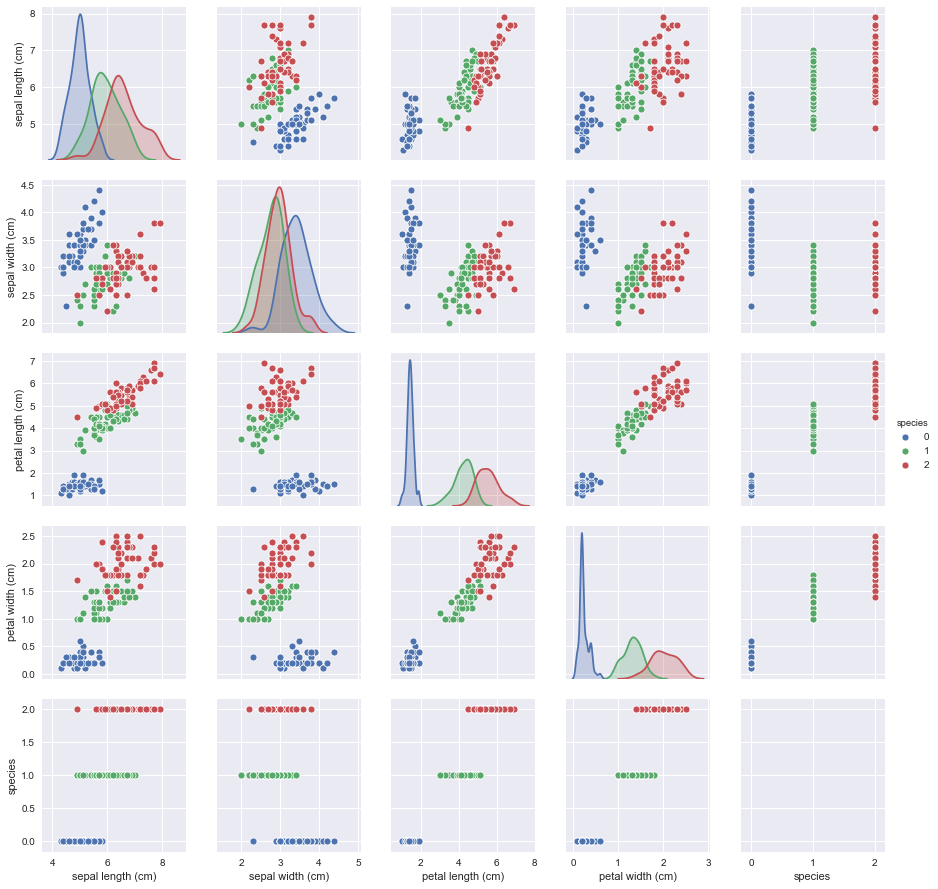

In [8]:
new_df = pd.concat([df_x,df_y], axis=1)
sns.pairplot(new_df, hue="species")
plt.show()

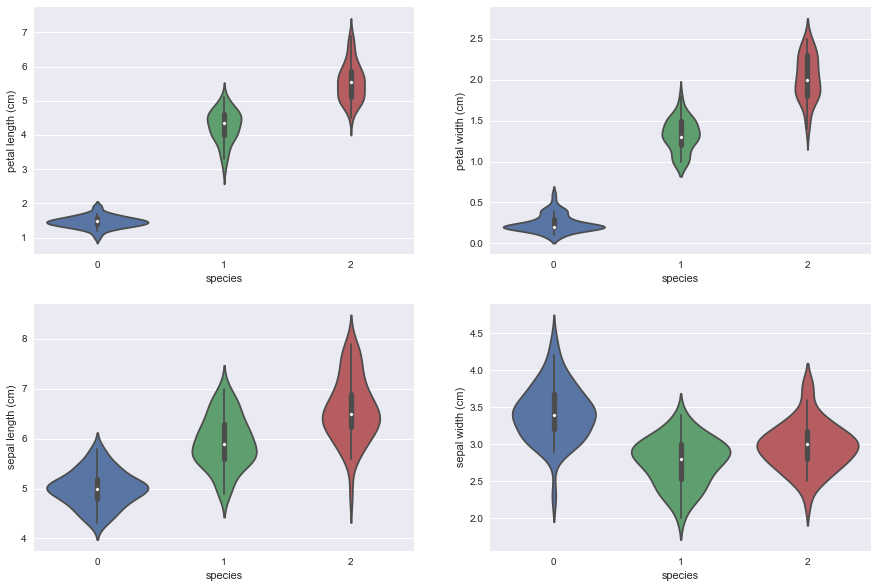

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal length (cm)',data=new_df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal width (cm)',data=new_df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal length (cm)',data=new_df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal width (cm)',data=new_df)

* 각 종마다 feature별 분포가 다양하게 나타나고 있습니다.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=0)

# ss = StandardScaler()
# X_train=ss.fit_transform(X_train)
# X_test=ss.transform(X_test)

train_set=np.column_stack((X_train, y_train))
test_set=np.column_stack((X_test, y_test))
print(train_set[:5])
print(test_set[:5])

[[6.4 3.1 5.5 1.8 2. ]
 [5.4 3.  4.5 1.5 1. ]
 [5.2 3.5 1.5 0.2 0. ]
 [6.1 3.  4.9 1.8 2. ]
 [6.4 2.8 5.6 2.2 2. ]]
[[5.8 2.8 5.1 2.4 2. ]
 [6.  2.2 4.  1.  1. ]
 [5.5 4.2 1.4 0.2 0. ]
 [7.3 2.9 6.3 1.8 2. ]
 [5.  3.4 1.5 0.2 0. ]]


In [11]:
def getDistance(p, instance1, instance2):
    if p == 1:
        distance = np.sum(np.absolute(instance2[:-1] - instance1[:-1]))
    if p == 2:
        distance = np.sqrt(np.sum(np.power((instance2[:-1]-instance1[:-1]),2)))
    return distance

def getNeighbors(p, train_set, test_set, k):
    distances = []
    for i in range(len(train_set)):
        dist = getDistance(p, test_set, train_set[i])
        distances.append((train_set[i], dist))
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    for j in range(k):
        neighbors.append(distances[j][0])
    return neighbors

neighbors = getNeighbors(1, train_set, test_set[13], 5)
print(neighbors)

[array([6.6, 2.9, 4.6, 1.3, 1. ]), array([6.6, 3. , 4.4, 1.4, 1. ]), array([6.4, 2.9, 4.3, 1.3, 1. ]), array([6.3, 2.8, 5.1, 1.5, 2. ]), array([6.1, 3. , 4.6, 1.4, 1. ])]


In [12]:
def getResponse(neighbors):
    votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in votes:
            votes[response] += 1
        else:
            votes[response] = 1
    sortedVotes = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
getResponse(neighbors)

1.0

In [13]:
def getAccuracy(test_set, predictions):
    score = 0
    for i in range(len(test_set)):
        if test_set[i][-1] == predictions[i]:
            score += 1
    return score / len(test_set) * 100


In [14]:
k = 3
p = 2
predictions=[]

for i in range(len(test_set)):
    neighbors = getNeighbors(p, train_set, test_set[i], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print(str(i) + ' > predicted : ' + str(result) + ', actual : ' + str(test_set[i][-1]))

0 > predicted : 2.0, actual : 2.0
1 > predicted : 1.0, actual : 1.0
2 > predicted : 0.0, actual : 0.0
3 > predicted : 2.0, actual : 2.0
4 > predicted : 0.0, actual : 0.0
5 > predicted : 2.0, actual : 2.0
6 > predicted : 0.0, actual : 0.0
7 > predicted : 1.0, actual : 1.0
8 > predicted : 1.0, actual : 1.0
9 > predicted : 1.0, actual : 1.0
10 > predicted : 2.0, actual : 2.0
11 > predicted : 1.0, actual : 1.0
12 > predicted : 1.0, actual : 1.0
13 > predicted : 1.0, actual : 1.0
14 > predicted : 2.0, actual : 1.0
15 > predicted : 0.0, actual : 0.0
16 > predicted : 1.0, actual : 1.0
17 > predicted : 1.0, actual : 1.0
18 > predicted : 0.0, actual : 0.0
19 > predicted : 0.0, actual : 0.0
20 > predicted : 2.0, actual : 2.0
21 > predicted : 1.0, actual : 1.0
22 > predicted : 0.0, actual : 0.0
23 > predicted : 0.0, actual : 0.0
24 > predicted : 2.0, actual : 2.0
25 > predicted : 0.0, actual : 0.0
26 > predicted : 0.0, actual : 0.0
27 > predicted : 1.0, actual : 1.0
28 > predicted : 1.0, actual :

In [15]:
accuracy = getAccuracy(test_set, predictions)
print('Accuracy: ' + str(accuracy) + '%')

Accuracy: 96.66666666666667%
